In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  win32


In [20]:
#bss=[64,128,256,512,1024]
bss=[32]
sch="plateau"
total_epochs=160
step=20

def train_plateau():
    for bs in bss:
        print("Training bs: " + str(bs))
        name="bs_"+str(bs) + "_sch_"+ sch
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        
        model_actions.progressive_train_4(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=plateau_lr_scheduler)

[autoreload of model_actions failed: Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/anaconda/envs/azureml_py36/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/anaconda/envs/azureml_py36/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/

In [21]:
az_manage_proc.run_and_delete(log.log_time,train_plateau)

Found existing instance, use it.
Logging time
Training bs: 32
Training


Epoch: 1
Saving best..

Epoch: 2
Saving best..

Epoch: 3
Saving best..

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6
Saving best..

Epoch: 7
Saving best..

Epoch: 8
Saving best..

Epoch: 9

Epoch: 10

Epoch: 11
Saving best..

Epoch: 12

Epoch: 13
Saving best..

Epoch: 14
Saving best..

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18
Saving best..

Epoch: 19

Epoch: 20
Saving both: 20


Epoch: 21
Saving best..

Epoch: 22

Epoch: 23
Saving best..

Epoch: 24

Epoch: 25

Epoch: 26
Saving best..

Epoch: 27

Epoch: 28
Saving best..

Epoch: 29

Epoch: 30

Epoch: 31
Saving best..

Epoch: 32

Epoch: 33
Saving best..

Epoch: 34
Saving best..

Epoch: 35
Saving best..

Epoch: 36
Saving best..

Epoch: 37

Epoch: 38
Saving best..

Epoch: 39
Saving best..

Epoch: 40
Saving both: 40


Epoch: 41

Epoch: 42
Saving best..

Epoch: 43

Epoch: 44

Epoch: 45
Saving best..

Epoch: 46

Epoch: 47
Saving best..

Epoch: 48
Saving best

Show Training graphs

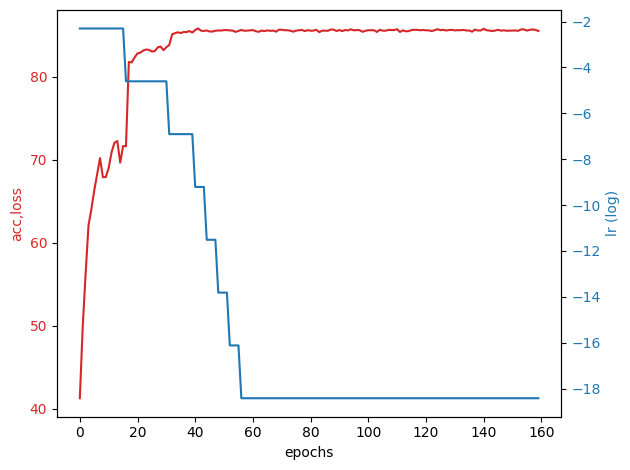

In [2]:

bs=128
loaded=utils.load("bs_"+str(bs)+"_sch_plateau.json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('acc,loss', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lr (log)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
bs=256
loaded=utils.load("bs_"+str(bs)+"_sch_plateau.json")